Notebook to check the Over preprocessed scans as well as to check registration

In [4]:
from nilearn import image as nimg
from nilearn import plotting as nplot
from nilearn import image
import os
import glob
import decouple 

In [5]:
config = decouple.AutoConfig(' ')
fmriprep_location = config('preprocessed_eft_2')
func_scans = glob.glob(os.path.join(fmriprep_location, 'sub-*', 'func', '*-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'))
anat_scans = glob.glob(os.path.join(fmriprep_location, 'sub-*', 'anat', '*-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz'))
bm_scans = glob.glob(os.path.join(fmriprep_location, 'sub-*', 'anat', '*-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz'))

In [6]:
participant = 'B2016'

In [10]:
t1w = [scan for scan in anat_scans if participant in scan][0]
t2w = [scan for scan in func_scans if participant in scan][0]
bm = [scan for scan in bm_scans if participant in scan][0]
anat = nimg.load_img(t1w)
func = nimg.load_img(t2w)
brainmask = nimg.load_img(bm)
func_mean = image.mean_img(func)
anat_mean = image.mean_img(anat)

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



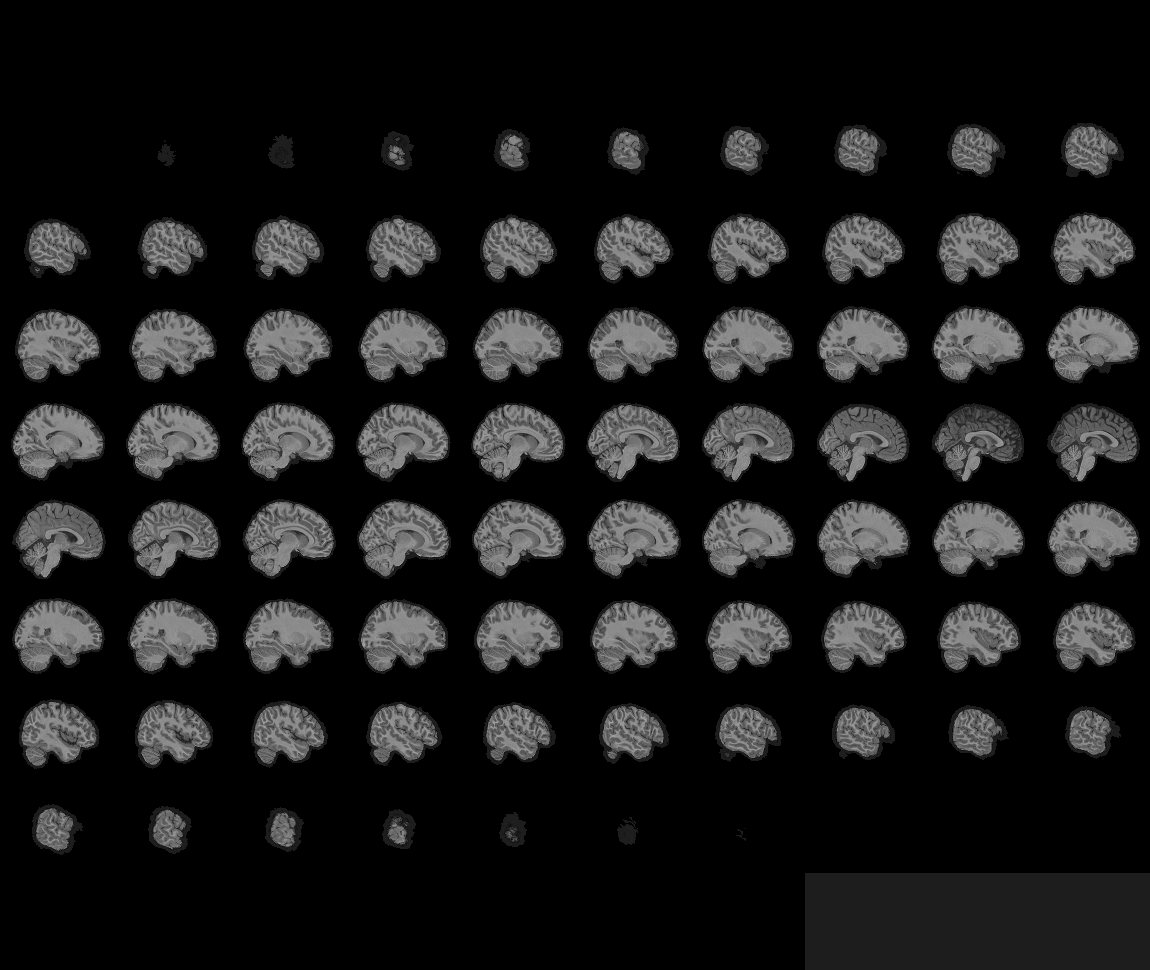
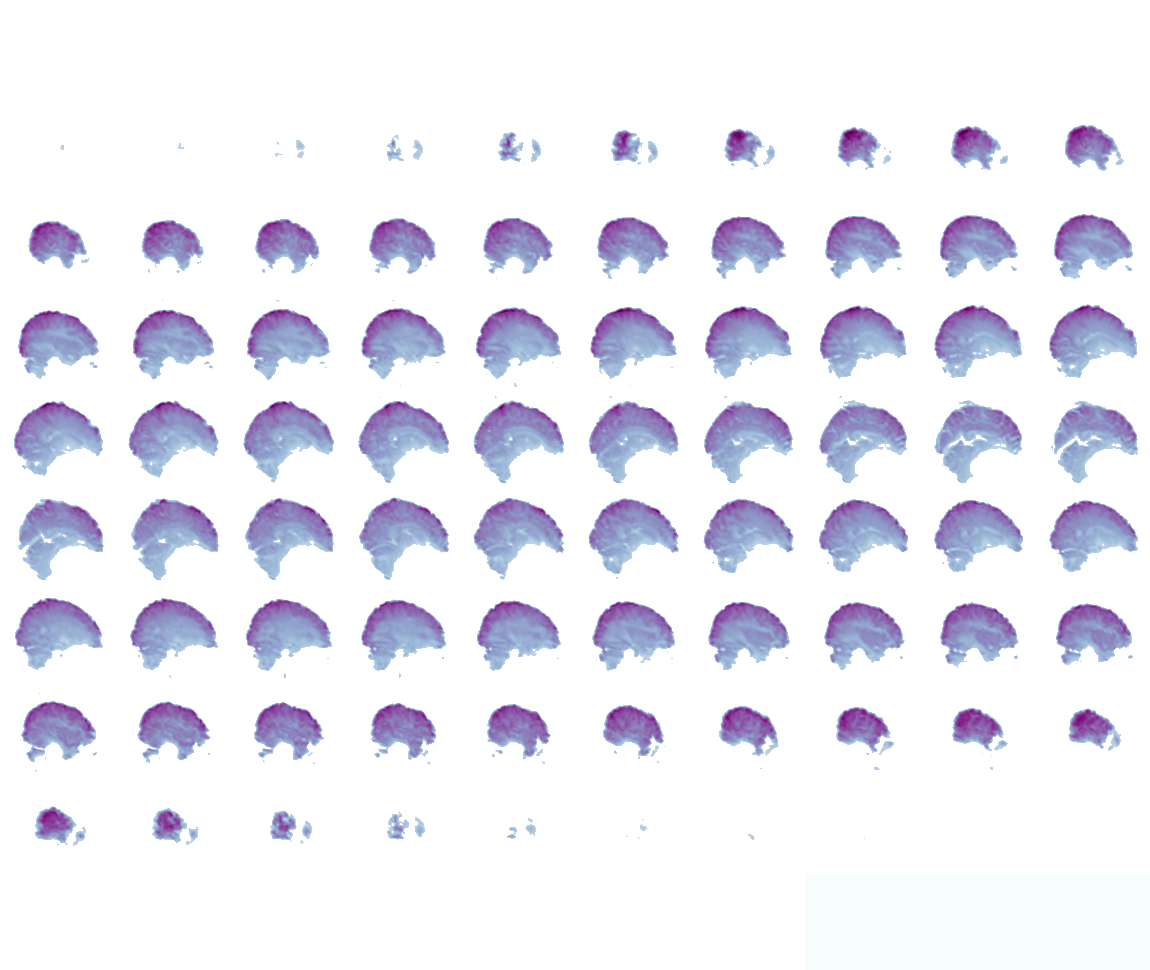

In [9]:
nplot.view_img(func_mean, bg_img=anat, cmap='BuPu', symmetric_cmap=False, opacity=0.7, threshold="auto", cut_coords=(0, 0, 0))          


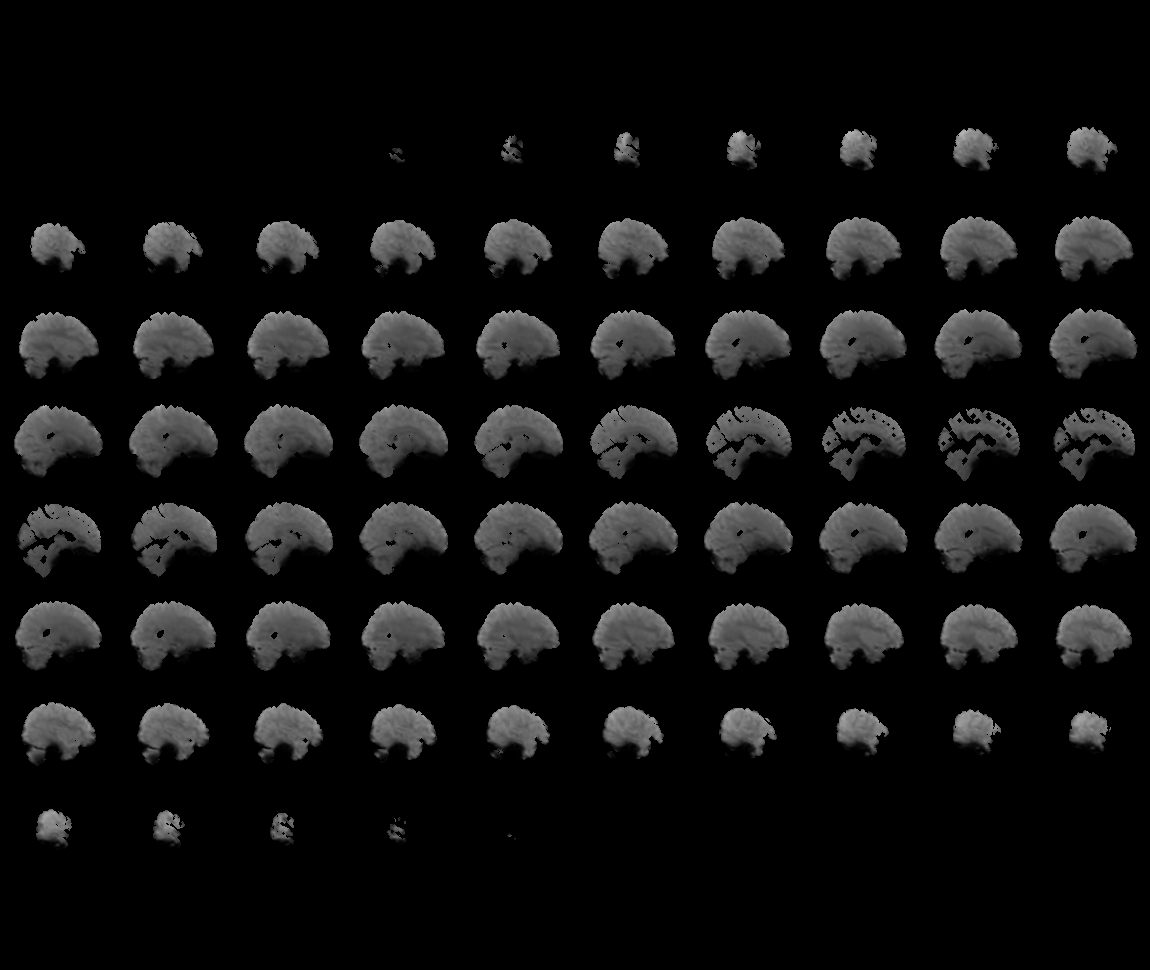
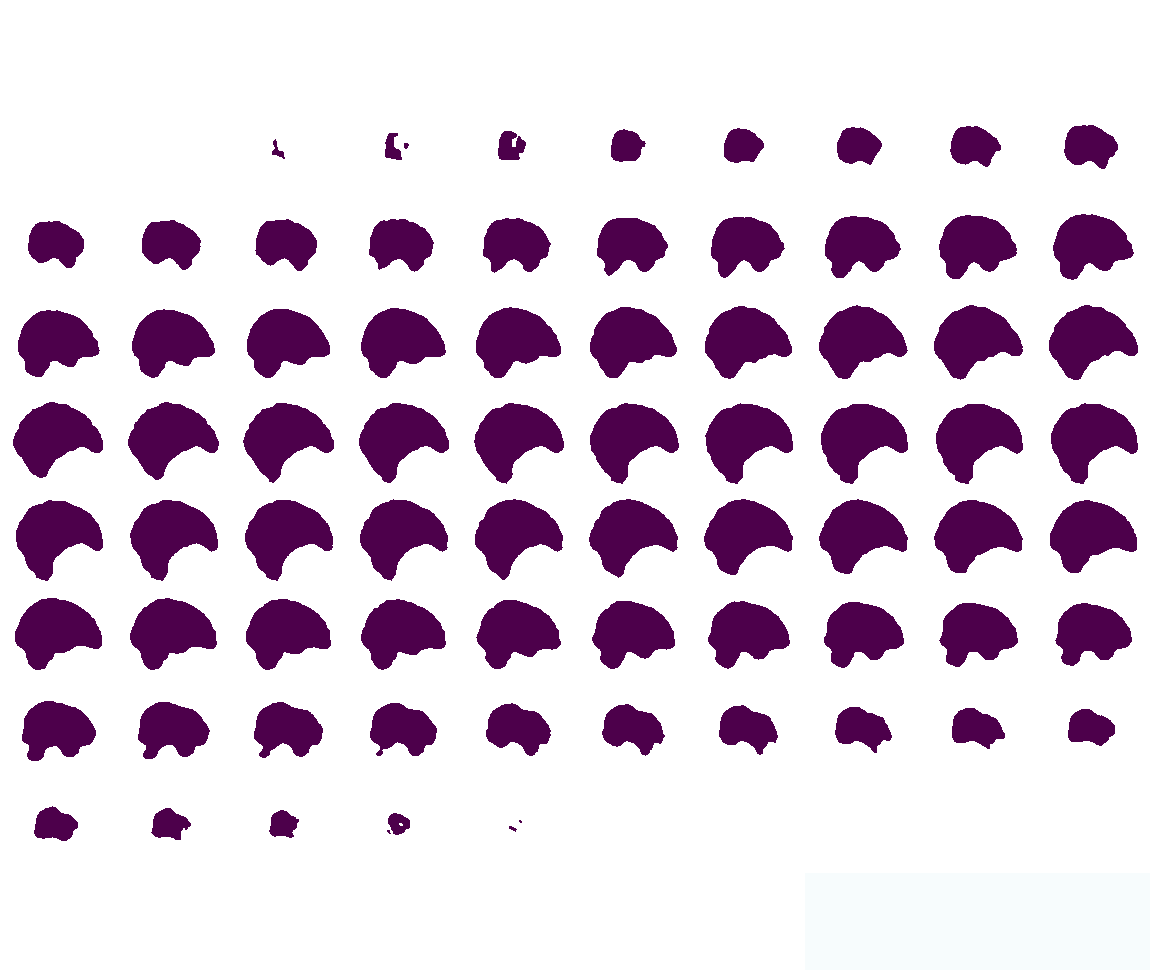

In [21]:
nplot.view_img(brainmask, bg_img=func_mean, cmap='BuPu', symmetric_cmap=False, opacity=0.7, threshold="auto", cut_coords=(0, 0, 0))   

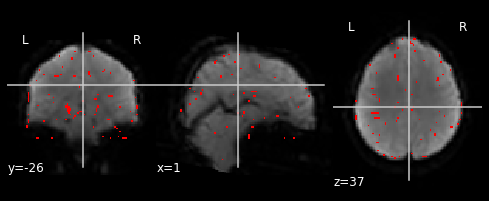

In [22]:
display = nplot.plot_anat(func_mean)
display.add_edges(anat_mean)